In [7]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from target_eval import create_target_df
from statistics import mean
from scipy.optimize import curve_fit

from radiometric_calibration import  make_avg_df,create_df,pixel_registration

In [41]:
#choose filepath to desired data
data_path = '/Users/kirahart/Dropbox/GitHub/IRCSP2_data/Cal_target_analysis/dec16/'
calibration_path = '/Users/kirahart/Dropbox/GitHub/IRCSP2_data/calibration_files/'

name1 = 'cam1_right.h5'
name2 = 'cam2_right.h5'

ymin1 = 105; ymax1 = 140;
ymin2 = 130; ymax2 = 165;

cal_file1 =calibration_path + 'cam1pixel.h5'
cal_file2 =calibration_path + 'cam2pixel.h5'

waves= np.linspace(7,12,61)

In [42]:
df1 = create_df(data_path,name1)
df2 = create_df(data_path,name2)
    
corrected_images1= []
corrected_images2= []

for i in range(len(df1)):
    c = pixel_registration(df1['images1'][i],cal_file1,waves,ymin1,ymax1)
    corrected_images1.append(c)

for i in range(len(df2)):
    c = pixel_registration(df2['images1'][i],cal_file2,waves,ymin2,ymax2)
    corrected_images2.append(c)

mean_ims1 = np.mean(corrected_images1,axis = 0)
mean_ims2 = np.mean(corrected_images2,axis = 0)

std_ims1  = np.std(corrected_images1,axis = 0)
std_ims2  = np.std(corrected_images2,axis = 0)
    
d =  {'ims1': list(mean_ims1),'s1': list(std_ims1), 'ims2':list(mean_ims2),'s2': list(std_ims2)}
    
df = pd.DataFrame.from_dict(d, orient='index')
df = df.transpose()


In [43]:
    
#create sum column
df["totalrad"] = df['ims2']+df['ims1']
df["totalstd"] = (df['s2']**2+df['s1']**2)**0.5
df

,ims1,s1,ims2,s2,totalrad,totalstd
0,"[23020.885, 23028.635, 23028.88, 23027.74, 230...","[9.057277460694257, 6.492247299664412, 9.09618...","[22526.63, 22523.69, 22520.665, 22527.63, 2253...","[6.655681783258567, 6.174050534292701, 5.82711...","[45547.515, 45552.325, 45549.545, 45555.37, 45...","[11.239767568771168, 8.959250805731461, 10.802..."
1,"[23020.57, 23018.77, 23025.57, 23034.035, 2303...","[10.604956388406316, 9.256462607281467, 8.7815...","[22516.815, 22510.645, 22523.155, 22530.115, 2...","[7.889757600839199, 7.48508349986825, 6.791426...","[45537.384999999995, 45529.415, 45548.725, 455...","[13.21791870908578, 11.90414108619349, 11.1012..."
2,"[23020.695, 23020.815, 23020.445, 23021.1, 230...","[11.474514150934668, 9.840898078935695, 8.2864...","[22520.845, 22527.38, 22524.39, 22518.265, 225...","[6.573695688119434, 6.615935308027122, 6.57251...","[45541.54, 45548.195, 45544.835, 45539.365, 45...","[13.224142694329943, 11.858072145167618, 10.57..."
3,"[23015.29, 23014.28, 23016.495, 23020.845, 230...","[9.158924609363275, 11.852915253219322, 9.4626...","[22522.63, 22521.705, 22517.225, 22514.84, 225...","[6.87481636118376, 6.003371969152, 5.954567574...","[45537.92, 45535.985, 45533.72, 45535.685, 455...","[11.452030387664895, 13.286537359297164, 11.18..."
4,"[23017.72, 23018.995, 23017.935, 23021.105, 23...","[10.442538005676571, 8.844629726562905, 7.9710...","[22516.975, 22523.075, 22524.115, 22525.795, 2...","[6.0804502300405385, 6.736978180163571, 6.6490...","[45534.695, 45542.07, 45542.05, 45546.89999999...","[12.083810450350487, 11.118199044809383, 10.38..."
5,"[23017.785, 23017.175, 23013.78, 23025.47, 230...","[7.418306747499727, 9.745094920009745, 12.3736...","[22519.765, 22517.825, 22519.975, 22519.415, 2...","[7.046082244765518, 6.658218605603157, 5.91285...","[45537.55, 45535.0, 45533.755, 45544.885, 4555...","[10.231253588881465, 11.802489144244099, 13.71..."
6,"[23015.395, 23022.13, 23020.98, 23025.66, 2302...","[9.951707139983567, 9.045888568847188, 8.60782...","[22517.63, 22524.36, 22516.24, 22518.975, 2252...","[7.1062015169850055, 7.186473404946257, 6.4855...","[45533.025, 45546.490000000005, 45537.22, 4554...","[12.22843305579255, 11.553073184222459, 10.777..."
7,"[23010.965, 23017.89, 23022.495, 23027.63, 230...","[9.10336613566652, 8.100179010367599, 11.33964...","[22511.01, 22516.29, 22521.47, 22526.465, 2253...","[6.300785665296029, 6.125022448938451, 5.94088...","[45521.975, 45534.18, 45543.965, 45554.095, 45...","[11.071186702427157, 10.15523510313768, 12.801..."
8,"[23013.51, 23016.62, 23021.615, 23028.66, 2303...","[10.2366938022, 9.421284413496931, 8.971024189...","[22520.66, 22521.905, 22526.615, 22529.145, 22...","[5.77705807483359, 5.403561325644415, 5.788719...","[45534.17, 45538.524999999994, 45548.23, 45557...","[11.754331116656527, 10.86089660203062, 10.676..."
9,"[23013.995, 23017.585, 23020.285, 23026.245, 2...","[9.889766175193428, 9.972475871116465, 11.5187...","[22515.895, 22523.42, 22526.735, 22527.98, 225...","[6.032120273999845, 6.491810225199129, 6.41149...","[45529.89, 45541.005, 45547.020000000004, 4555...","[11.584211237714893, 11.89932245970333, 13.182..."


In [44]:
lut =  h5py.File('/Users/kirahart/Dropbox/GitHub/IRCSP2_data/calibration_files/LUT.h5', "r")
As=list(lut['A'])
Bs= list(lut['B'])

In [45]:
def finv(y,A,B):
    return ((y-B)/A)**0.5


#attempt retrival
Ts= np.zeros([35,len(waves)])
for w in range(len(waves)):
    for s in range(35):
        data= list(df['totalrad'])[s][w]
        A= As[s][w]
        B = Bs[s][w]
        t = finv(data,A,B)
        Ts[s][w] = t

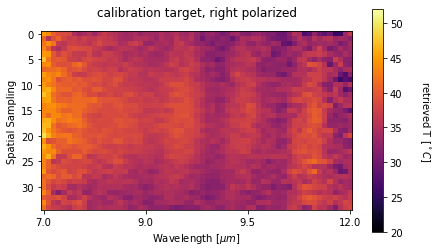

In [46]:

plt.matshow(Ts,cmap = 'inferno' )
cbar = plt.colorbar()
cbar.set_label('retrieved T [$^\circ C$]\n', rotation=-90, va="bottom")
plt.ylabel('Spatial Sampling')
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],round(waves[20]),waves[30],waves[60]])
plt.title('calibration target, right polarized')
plt.clim(20,52)
plt.show()

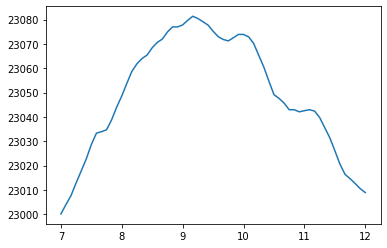

In [49]:
plt.plot(waves,np.mean(mean_ims1,axis = 0))